In [1]:
import glob
from math import ceil
import os
from pprint import pprint
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
results_dir = "../domain_shift_results"

# experiments still in process; ignore any existing results for these.
in_process_expts = [
    "_debug",
    'diabetes_admtype',  # not in progress - we just want to exclude from results (removed from benchmark)
]

In [31]:
def extract_task_from_filepath(fp:str)->str:
    task = re.search(".*/domain_shift_results/(\w+)/.*", fp).group(1)
    return task

# a list of RGB values for categorical plotting
rgblist = list(sns.color_palette("colorblind", 16))

In [32]:
files = []

for expt in os.listdir(results_dir):
    if expt in in_process_expts:
        print(f"skipping in progress expt at {expt}")
        continue
    wc = os.path.join(results_dir, expt, "**", "**_full.csv")
    full_results = glob.glob(wc)
    if full_results:
        most_recent_result = full_results[-1]
        print(f"got recent result file for expt {expt}")
        files.append(most_recent_result)

got recent result file for expt brfss_blood_pressure_bmi
got recent result file for expt anes_year
got recent result file for expt acsfoodstamps_region
got recent result file for expt acsunemployment_edlvl
got recent result file for expt physionet_unit1
got recent result file for expt brfss_diabetes_race
got recent result file for expt acsincome_region
got recent result file for expt anes_region
got recent result file for expt acspubcov_disability
got recent result file for expt nhanes_lead_poverty
got recent result file for expt mimic_extract_los_3_ins
got recent result file for expt mooc_course
skipping in progress expt at _debug
got recent result file for expt physionet_set
got recent result file for expt diabetes_admsrc
skipping in progress expt at diabetes_admtype
got recent result file for expt acspubcov_year
got recent result file for expt acsunemployment_mobility
got recent result file for expt nhanes_cholesterol_race
got recent result file for expt physionet_unit2
got recent r

In [33]:
dfs = []
for f in files:
    df = pd.read_csv(f)
    task = extract_task_from_filepath(f)
    df["task"] = task
    dfs.append(df)

In [34]:
len(dfs)

22

In [35]:
df = pd.concat(dfs)
df['domain_split_ood_values'] = df['domain_split_ood_values'].apply(lambda x: str(x).replace("'", ""))
df['domain_split_id_values'] = df['domain_split_id_values'].apply(lambda x: str(x).replace("'", ""))
df['ood_id_test_accuracy_gap'] = df['ood_test_accuracy'] - df['id_test_accuracy']
df

,train-auc,train-map,validation-auc,validation-map,id_test_2-auc,id_test_2-map,id_test_3-auc,id_test_3-map,id_test_4-auc,id_test_4-map,...,id_test_75-map,id_test_72_accuracy,id_test_73_accuracy,id_test_74_accuracy,id_test_75_accuracy,id_test_72-average_precision,id_test_73-average_precision,id_test_74-average_precision,id_test_75-average_precision,ood_id_test_accuracy_gap
0,0.701755,0.756890,0.697437,0.749190,0.686486,0.688908,0.677991,0.788700,0.684930,0.706601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.026754
1,0.683370,0.738031,0.684158,0.737292,0.668590,0.671013,0.657242,0.774025,0.664984,0.693698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008038
2,0.686323,0.740211,0.685179,0.737893,0.670697,0.670865,0.663125,0.778509,0.652041,0.680935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030966
3,0.683646,0.740905,0.684576,0.739407,0.669660,0.674480,0.660497,0.777960,0.656338,0.690011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007732
4,0.684952,0.737829,0.684786,0.736727,0.671560,0.672139,0.663270,0.776327,0.673214,0.701052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.022688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
96,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
97,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
98,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [36]:
print(sorted(df.task.unique()))
# print(sorted(df.columns))

['acsfoodstamps_region', 'acsincome_region', 'acspubcov_disability', 'acspubcov_year', 'acsunemployment_edlvl', 'acsunemployment_mobility', 'acsunemployment_year', 'anes_region', 'anes_year', 'brfss_blood_pressure_bmi', 'brfss_blood_pressure_income', 'brfss_diabetes_race', 'diabetes_admsrc', 'heloc_burden', 'mimic_extract_los_3_ins', 'mimic_extract_mort_hosp_ins', 'mooc_course', 'nhanes_cholesterol_race', 'nhanes_lead_poverty', 'physionet_set', 'physionet_unit1', 'physionet_unit2']


In [37]:
def best_by_metric(df_in, metric='validation_accuracy'):
    df_out = df_in.groupby(['task', 'estimator', 'domain_split_ood_values'])\
               .apply(lambda group: group.nlargest(1, columns=metric))\
               .reset_index(drop=True)
    
    # check the outputs
    group_sizes = df_out.groupby(['task', 'estimator', 'domain_split_ood_values']).size()
    if not np.all(group_sizes.values == 1):
        print(group_sizes)
        raise ValueError("got unexpected results - more than one observation per group.")
    return df_out

In [38]:
best_acc_per_task = best_by_metric(df)
best_acc_per_task[['validation_accuracy', 'task', 'estimator', 'domain_split_ood_values']]

,validation_accuracy,task,estimator,domain_split_ood_values
0,0.842778,acsfoodstamps_region,lightgbm,[00]
1,0.842918,acsfoodstamps_region,lightgbm,[01]
2,0.838865,acsfoodstamps_region,lightgbm,[02]
3,0.841778,acsfoodstamps_region,lightgbm,[03]
4,0.840553,acsfoodstamps_region,lightgbm,[04]
...,...,...,...,...
155,0.983212,physionet_unit1,xgb,[1]
156,0.982973,physionet_unit2,lightgbm,[0]
157,0.980647,physionet_unit2,lightgbm,[1]
158,0.983212,physionet_unit2,xgb,[0]


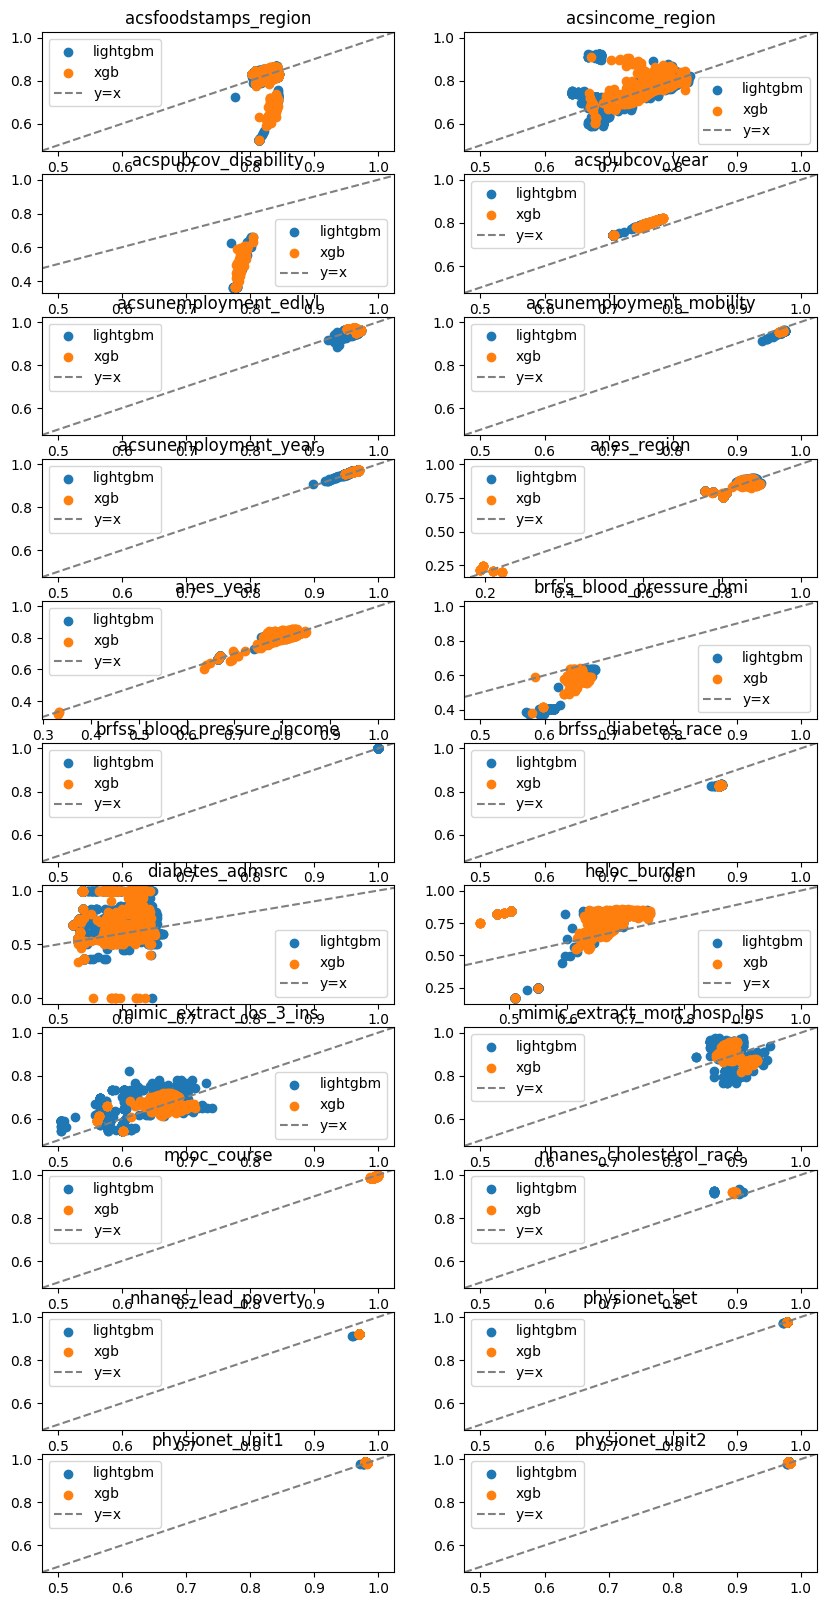

In [39]:
tasks = sorted(df.task.unique())

fig, axs = plt.subplots(ncols=2, nrows=ceil(len(tasks)/2), figsize=(10,20))
for i, task in enumerate(tasks):
    rownum = i // 2
    colnum = i % 2
    ax = axs[rownum,colnum]
    for est in sorted(df.estimator.unique()):
        df_ = df.query(f"estimator == '{est}' and task == '{task}'")
        ax.scatter(df_['id_test_accuracy'].values, df_['ood_test_accuracy'].values, label=est)
    ax.axline((0.5,0.5), (1, 1), linestyle="dashed", color="grey", label="y=x")
    ax.legend()
    
    ax.set_title(task)

empty dataframe for estimator xgb task brfss_blood_pressure_income; skipping
empty dataframe for estimator lightgbm task brfss_blood_pressure_income; skipping


/var/folders/3f/96kfmy7s1y5_5fr8cgqtfzpm0000gn/T/ipykernel_5232/3112543295.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))


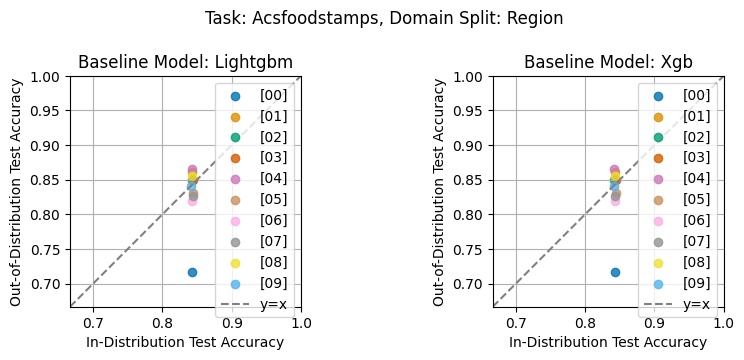

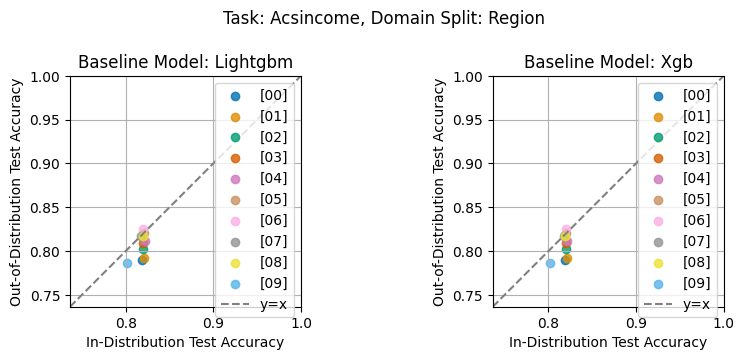

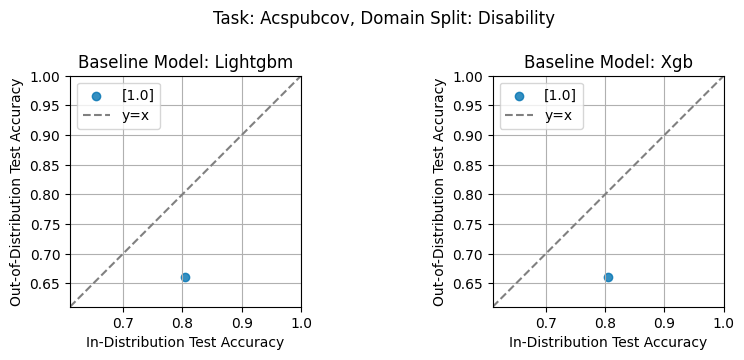

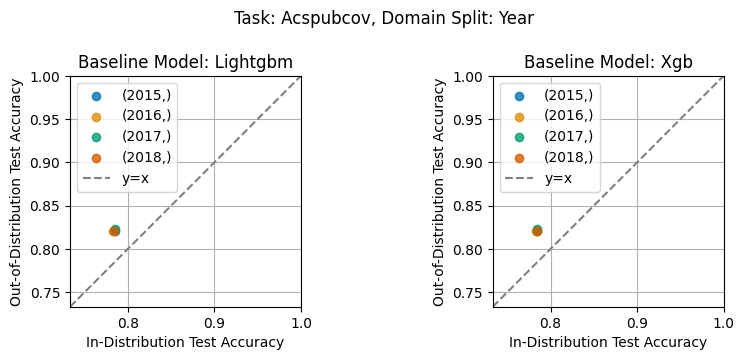

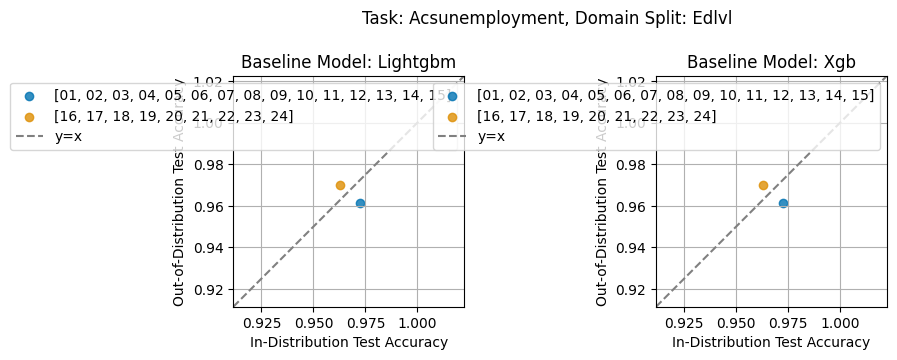

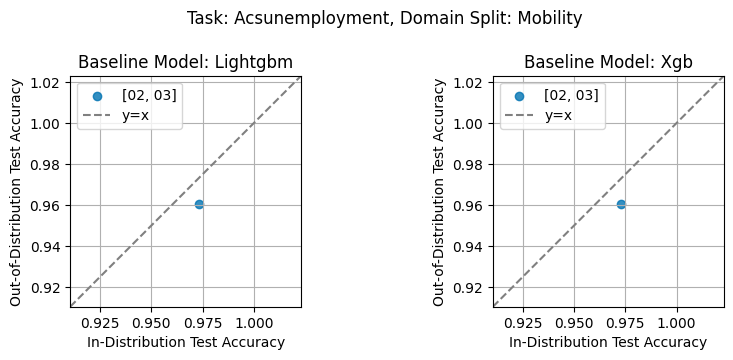

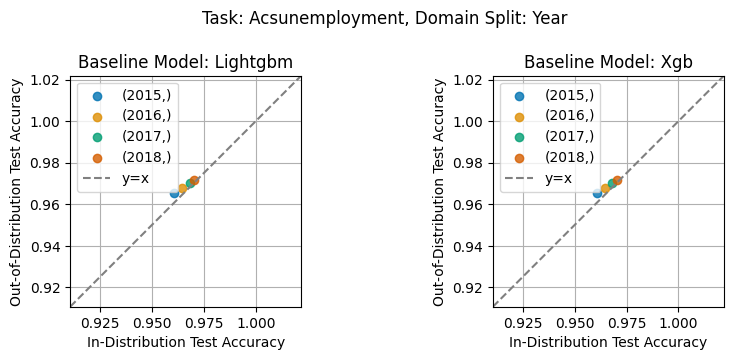

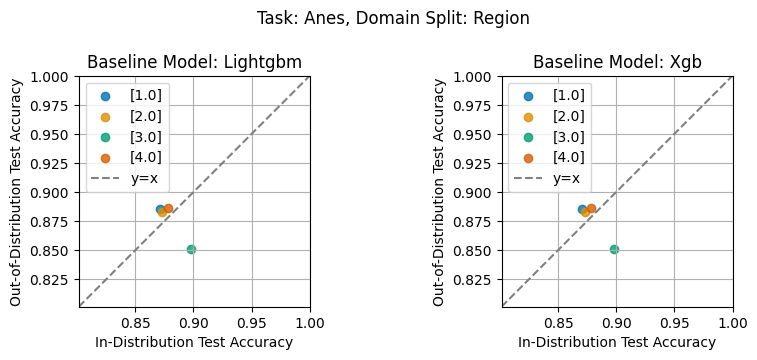

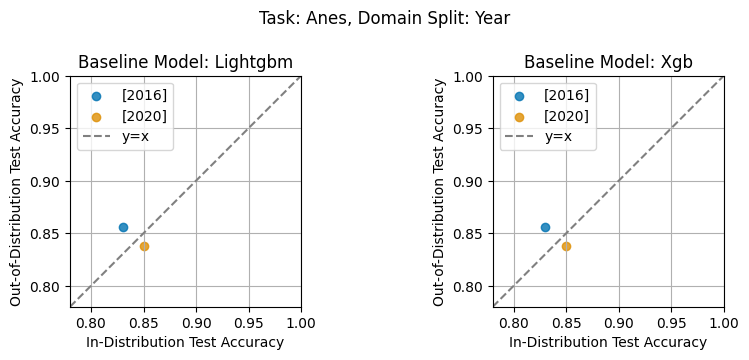

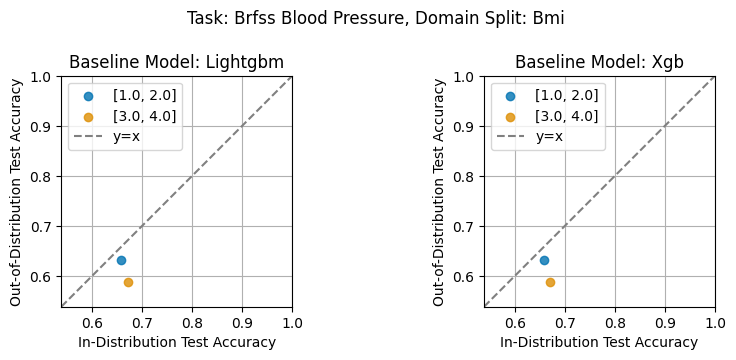

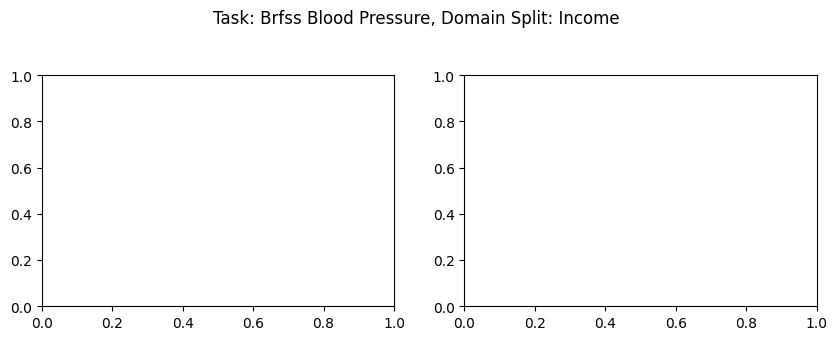

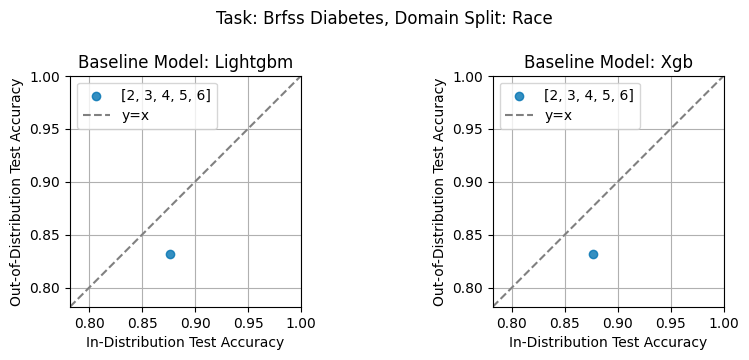

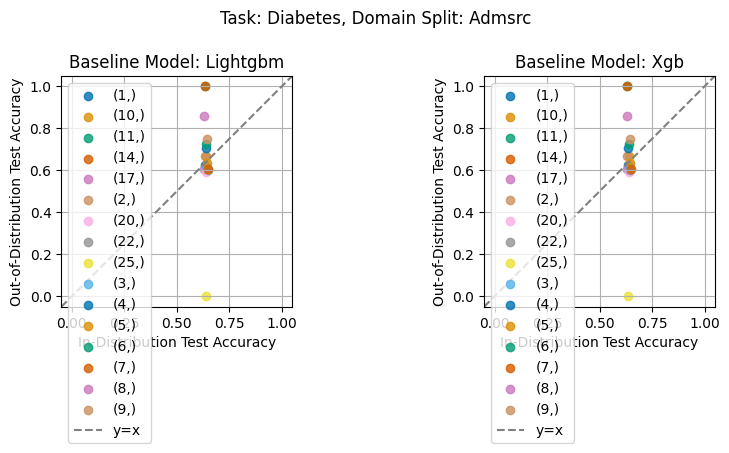

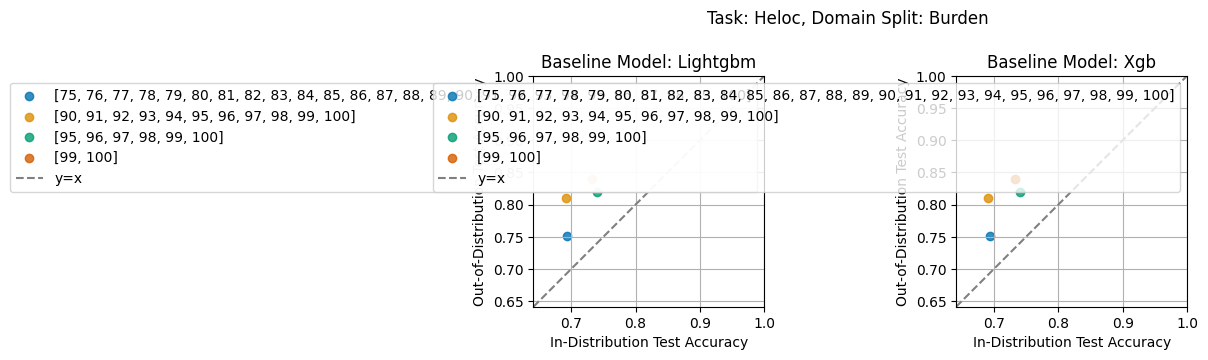

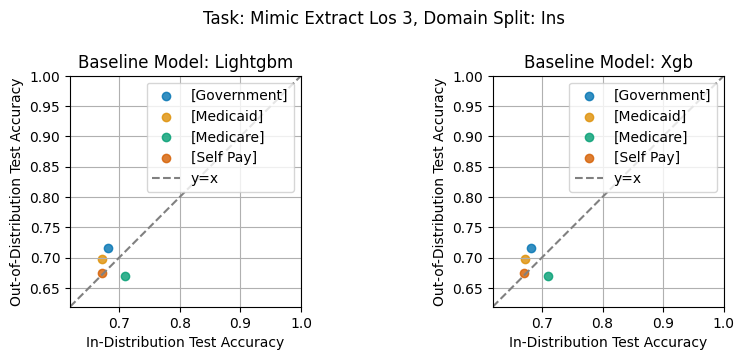

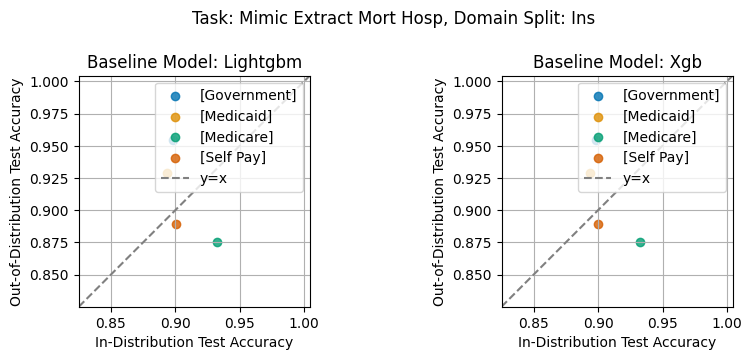

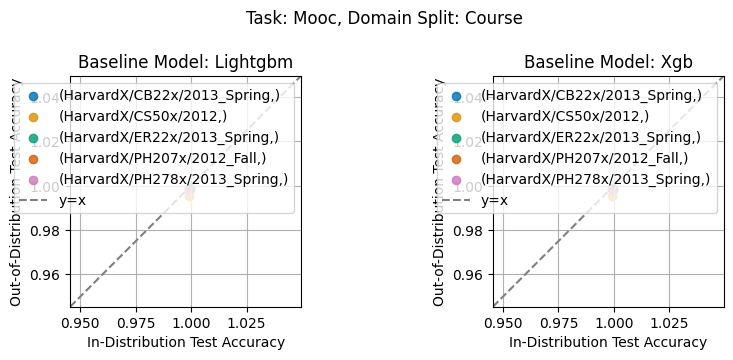

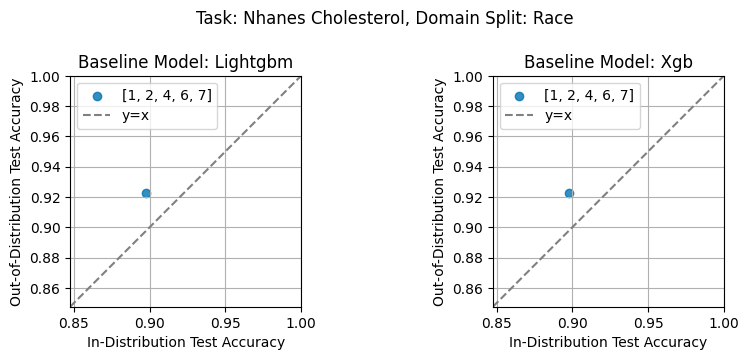

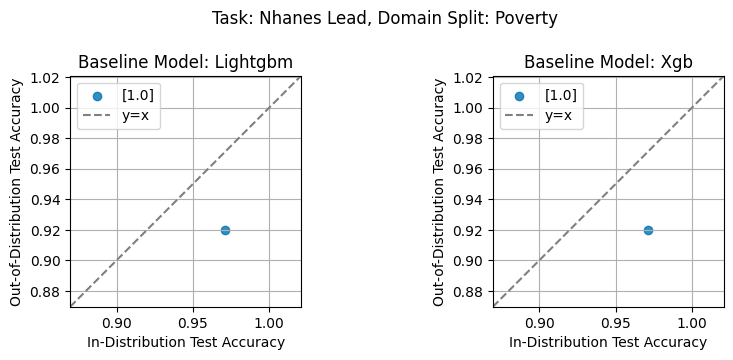

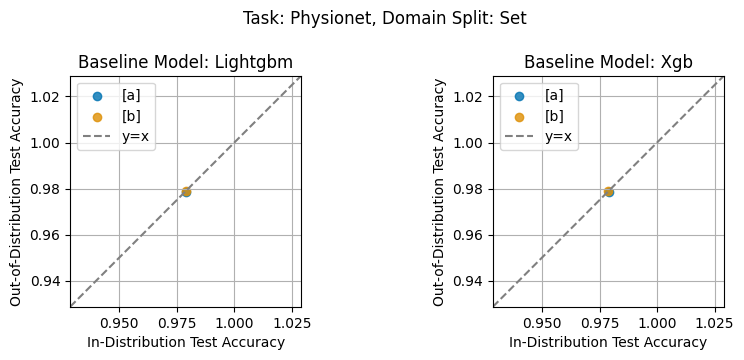

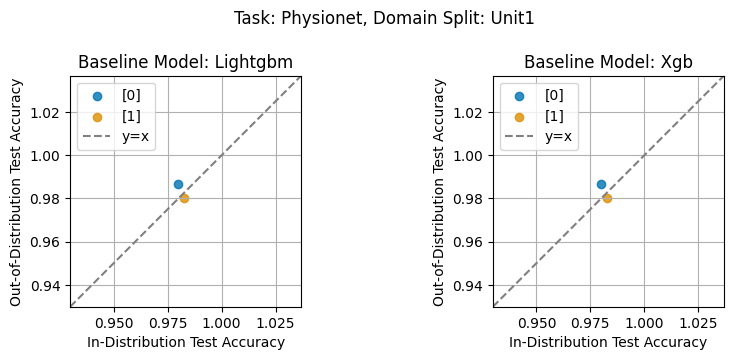

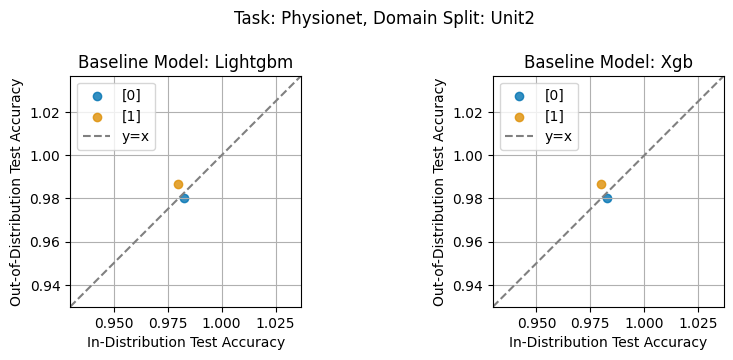

In [40]:
axpad = 0.05  # amount to pad x and y axes in either direction.

for task in tasks:
    task_name, split_name = task.rsplit("_", 1)
    
    estimators = ('xgb', 'lightgbm')
    if not len(best_acc_per_task.query(f"task == '{task}'")):
        continue
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

    for i, estimator in enumerate(estimators):
        ax = axs[i-1]
        df_ = best_acc_per_task.query(f"estimator == '{est}' and task == '{task}'")
        if not len(df_):
            print(f"empty dataframe for estimator {estimator} task {task}; skipping")
            continue
        for j, ood_vals in enumerate(df_['domain_split_ood_values'].unique()):
            tmp = df_.query(f"domain_split_ood_values == '{ood_vals}'")
            assert len(tmp) == 1
            ax.scatter(tmp['id_test_accuracy'].values, 
                        tmp['ood_test_accuracy'].values,
                        # tmp['ood_id_test_accuracy_gap'],
                        label=ood_vals,
                       color=rgblist[j],
                        alpha=0.8)
        xymin = min(df_['id_test_accuracy'].values.min(),
                    df_['ood_test_accuracy'].values.min()) - axpad

        xymax = max(df_['id_test_accuracy'].values.max(),
                    df_['ood_test_accuracy'].values.max()) + axpad
        xymax = max(xymax, 1)
        ax.axline( (xymin,xymin), slope=1, linestyle="dashed", color="grey", label="y=x")        
        ax.set_xlabel("In-Distribution Test Accuracy")
        ax.set_ylabel("Out-of-Distribution Test Accuracy")
        ax.set_title(f"Baseline Model: {estimator.title()}")
        ax.set(xlim=(xymin,xymax), ylim=(xymin,xymax))
        ax.set_aspect("equal")
        
        ax.legend()
        ax.grid()
    plt.suptitle(f"Task: {task_name.replace('_', ' ').title()}, Domain Split: {split_name.title()}", y=1.1)
#     axs[0].legend(bbox_to_anchor=(1.5, -0.2, 0.5, 0.5), ncols=df_['domain_split_ood_values'].nunique())
        


IndexError: list index out of range

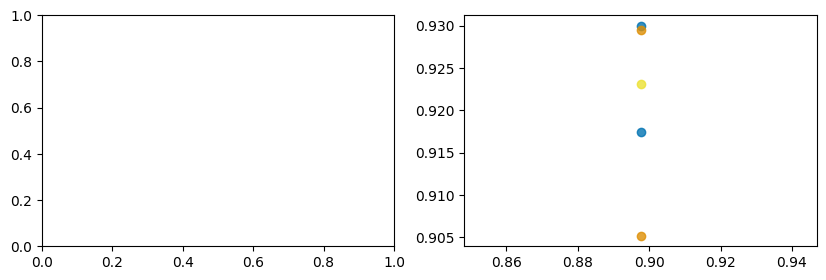

In [16]:
import re
# plot per domain
task = 'nhanes_cholesterol_race'
ood_acc_cols = [x for x in best_acc_per_task.columns if re.search("^ood_test_(\d+)_accuracy", x)]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
task_name, split_name = task.rsplit("_", 1)


for i, estimator in enumerate(estimators):
    ax = axs[i-1]
    df_ = best_acc_per_task.query(f"estimator == '{est}' and task == '{task}'")

    for j, colname in enumerate(ood_acc_cols):
        tmp = df_
        ood_value = re.search("^ood_test_(\d+)_accuracy", colname).group(1)
        assert len(tmp) == 1, tmp
        ax.scatter(tmp['id_test_accuracy'].values, 
                    tmp[colname].values,
                    label=str(ood_value),
                   color=rgblist[j],
                    alpha=0.8)
    xymin = min(df_['id_test_accuracy'].values.min(),
                df_[ood_acc_cols].values.min()) - axpad

    xymax = max(df_['id_test_accuracy'].values.max(),
                df_[ood_acc_cols].values.max()) + axpad
    xymax = max(xymax, 1)
    ax.axline( (xymin,xymin), slope=1, linestyle="dashed", color="grey", label="y=x")        
    ax.set_xlabel("In-Distribution Test Accuracy")
    ax.set_ylabel("Out-of-Distribution Test Accuracy")
    ax.set_title(f"Baseline Model: {estimator.title()}")
    ax.set(xlim=(xymin,xymax), ylim=(xymin,xymax))
    ax.set_aspect("equal")

    ax.legend()
    ax.grid()
    
plt.suptitle(f"Task: {task_name.replace('_', ' ').title()}, Domain Split: {split_name.title()}", y=1.1) 

In [ ]:
tasks